# Assignment-1

Due on September, 27.


This exercise will require you to pull some data from the `yahoo finance`. Yahoo finance is currently the one of most widely used API of financial market data.

Yahoo finance has a large number of data sources, but, you restrict your attention to the extraction of the stock price.

For this assignment, we will focus on Apple and Microsoft stock prices data from the S&P-500, a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. You'll analyze these stock prices. These company are listed under the stock ticker `aapl` and `msft`.

These are your tasks for this mini project:

1. Collect daily closing price stock price of Apple and Microsoft covering the period of 2020-01-01 - 2021-01-01 (keep in mind that the date format is YYYY-MM-DD). (15 pts)
2. Draw the line plot for the stock prices and interpret the stock price movement, if there is any. (15 pts)
3. Calculate stock return of Apple and Microsoft in this period. (15 pts)
4. What is the largest return of these companies during this period? (15 pts)
5. Draw the histogram of the returns and interpret the distributions you obtained. (15 pts)
6. Use QQ plot and see if the stock returns follow normal distribution. (15 pts)
7. Calculate the correlation coefficient between these stock returns and interpret. (10 pts)



In [1]:
!pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
plt.style.use('seaborn')

In [4]:
stocks = ['AAPL', 'MSFT'] 
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 1, 1)
port = yf.download(stocks, start=start, end=end, interval='1d')
port

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2020-01-02   73.683571  156.592010   75.087502  160.619995   75.150002   
2020-01-03   72.967209  154.642151   74.357498  158.619995   75.144997   
2020-01-06   73.548637  155.041870   74.949997  159.029999   74.989998   
2020-01-07   73.202728  153.628235   74.597504  157.580002   75.224998   
2020-01-08   74.380287  156.075287   75.797501  160.089996   76.110001   
...                ...         ...         ...         ...         ...   
2020-12-24  130.620895  219.464447  131.970001  222.750000  133.460007   
2020-12-28  135.292664  221.641876  136.690002  224.960007  137.339996   
2020-12-29  133.491257  220.843811  134.869995  224.149994  138.789993   
2020-12-30  132.353012  218.410248  133.720001  221.679993  135.990005   
2020-12-31  131.333542  219.139328  132.690002  222.419998  134.740005   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2020-01-02  160.729996   73.797501  158.330002   74.059998  158.779999   
2020-01-03  159.949997   74.125000  158.059998   74.287498  158.320007   
2020-01-06  159.100006   73.187500  156.509995   73.447502  157.080002   
2020-01-07  159.669998   74.370003  157.320007   74.959999  159.320007   
2020-01-08  160.800003   74.290001  157.949997   74.290001  158.929993   
...                ...         ...         ...         ...         ...   
2020-12-24  223.610001  131.100006  221.199997  131.320007  221.419998   
2020-12-28  226.029999  133.509995  223.020004  133.990005  224.449997   
2020-12-29  227.179993  134.339996  223.580002  138.050003  226.309998   
2020-12-30  225.630005  133.399994  221.470001  135.580002  225.229996   
2020-12-31  223.000000  131.720001  219.679993  134.080002  221.699997   

               Volume            
                 AAPL      MSFT  
Date                             
2020-01-02  135480400  22622100  
2020-01-03  146322800  21116200  
2020-01-06  118387200  20813700  
2020-01-07  108872000  21634100  
2020-01-08  132079200  27746500  
...               ...       ...  
2020-12-24   54930100  10550600  
2020-12-28  124486200  17933500  
2020-12-29  121047300  17403200  
2020-12-30   96452100  20272300  
2020-12-31   99116600  20942100  

[253 rows x 12 columns]

In [5]:
closing = port['Close']
closing

,AAPL,MSFT
Date,,
2020-01-02,75.087502,160.619995
2020-01-03,74.357498,158.619995
2020-01-06,74.949997,159.029999
2020-01-07,74.597504,157.580002
2020-01-08,75.797501,160.089996
...,...,...
2020-12-24,131.970001,222.750000
2020-12-28,136.690002,224.960007
2020-12-29,134.869995,224.149994


Text(0, 0.5, 'returns')

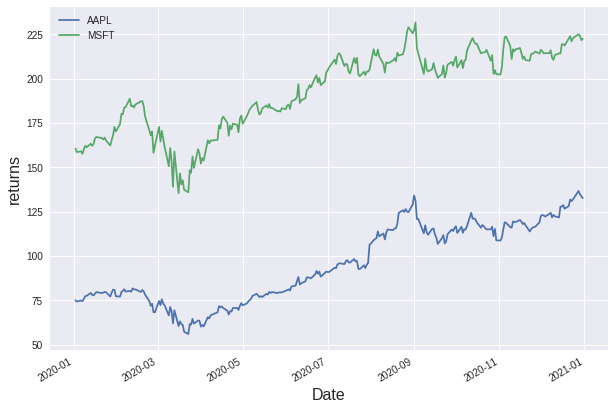

In [6]:
fig, ax = plt.subplots(figsize =(10, 7))
closing.iloc[:].plot(kind = 'line', ax = ax)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('returns', fontsize =16 )

### In the Give time Span both stocks followed the same trend and max stock value for both stocks obsereved in the 2020-sep and min stock value for both stocks observed in 2020-april 

In [7]:
stock_returns = closing.pct_change()

In [8]:
stock_returns

,AAPL,MSFT
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009722,-0.012452
2020-01-06,0.007968,0.002585
2020-01-07,-0.004703,-0.009118
2020-01-08,0.016086,0.015928
...,...,...
2020-12-24,0.007712,0.007827
2020-12-28,0.035766,0.009921
2020-12-29,-0.013315,-0.003601


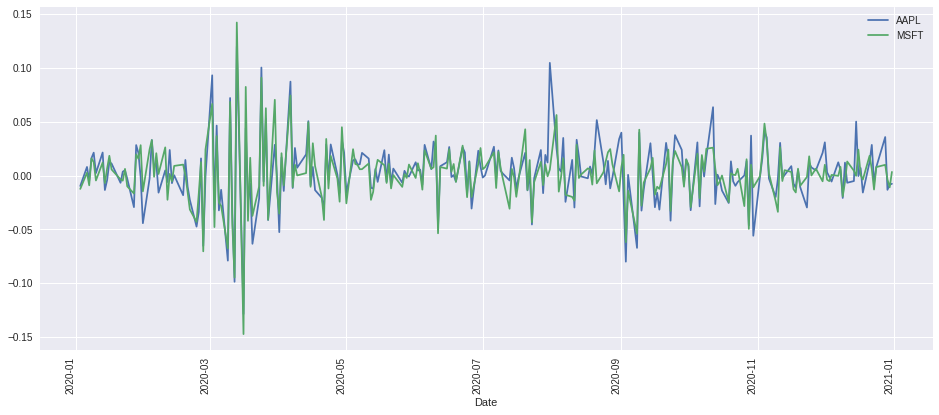

In [9]:
fig, ax = plt.subplots(figsize =(16, 7))
stock_returns.plot(ax=ax,rot=90)

In [10]:
max_stock_returns = stock_returns.max()
max_stock_returns


AAPL    0.119808
MSFT    0.142169
dtype: float64

In [11]:
stock_returns.loc[stock_returns.idxmax()]

,AAPL,MSFT
Date,,
2020-03-13,0.119808,0.142169
2020-03-13,0.119808,0.142169


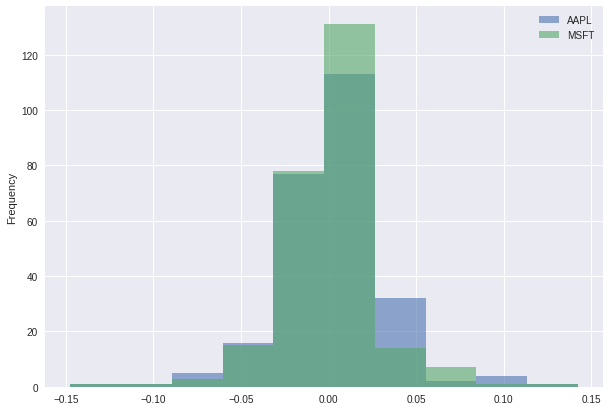

In [12]:
fig, ax = plt.subplots(figsize =(10, 7))
stock_returns.iloc[:].plot(kind = 'hist', ax = ax, alpha=0.6)

### Most of the Stock returns  distribution are in the range of -0.05 to 0.05

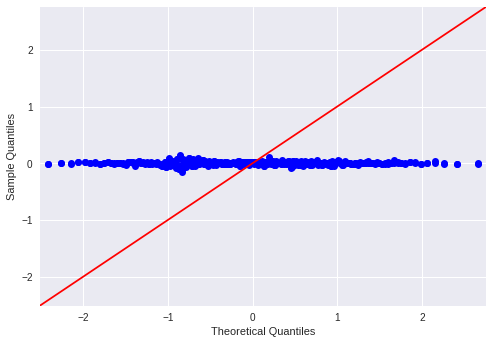

In [13]:
fig = sm.qqplot(stock_returns, line='45')

### The Stock returns are clearly not following the 45 degree Line which indicates that it not follows the Normal distribution


In [14]:
correlation = stock_returns['MSFT'].corr(stock_returns['AAPL'])
correlation

0.838891875795644

### The Stock_Returns between Apple and Microsoft Having a high correlation of 0.83889. 
- if value above 0.7 is having a high correlation